In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import SVG
import graphviz

In [2]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [3]:
iris = datasets.load_iris()

X = iris.data[:, 2:]    # petal length & width
y = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
graph = graphviz.Source(export_graphviz(tree_clf, out_file=None, 
                                        feature_names=iris.feature_names[2:], 
                                        class_names=iris.target_names, 
                                        filled=True, rounded=True))

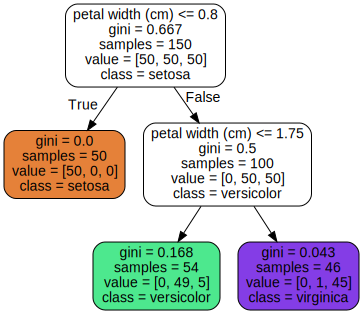

In [6]:
SVG(graph.pipe('svg'))

In [7]:
1 - np.dot([1/3, 1/3, 1/3], [1/3, 1/3, 1/3])

0.6666666666666667

In [8]:
1 - np.dot([0, .5, .5], [0, .5, .5])

0.5

In [9]:
1 - np.dot([49/54, 5/54], [49/54, 5/54])

0.16803840877914955

In [10]:
1 - np.dot([1/46, 45/46], [1/46, 45/46])

0.04253308128544431

#### Regression

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
m = 200

X = np.random.rand(m, 1)
y = 4*(X - 0.5)**2 + np.random.randn(m, 1)/10

Text(0,0.5,'$y$')

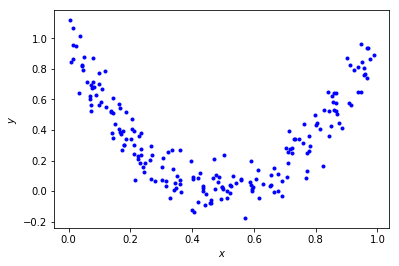

In [14]:
plt.plot(X, y, 'b.')
plt.xlabel('$x$')
plt.ylabel('$y$')

In [16]:
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [17]:
graph = graphviz.Source(export_graphviz(tree_reg, out_file=None, 
                                        feature_names=['x1'], 
                                        rounded=True, filled=True))

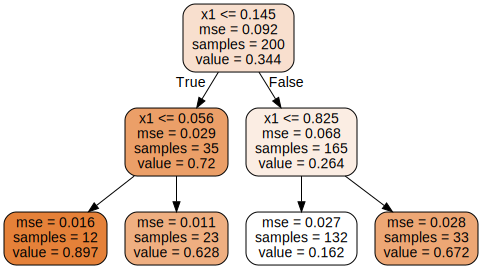

In [18]:
SVG(graph.pipe('svg'))

In [29]:
def plot_regression_decision(reg, X, y, axes=[0, 1], title=''):
    plt.figure(figsize=(8, 5))
    x1 = np.linspace(axes[0], axes[1], 500)
    y1_pred = reg.predict(x1[:, None])

    plt.plot(X, y, 'b.')
    plt.plot(x1, y1_pred, 'r-', label=r"$\hat{y}$")
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.title(title)
    plt.legend(loc='best')

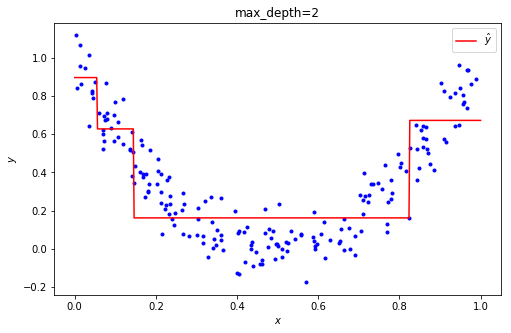

In [30]:
plot_regression_decision(tree_reg, X, y, title='max_depth=2')

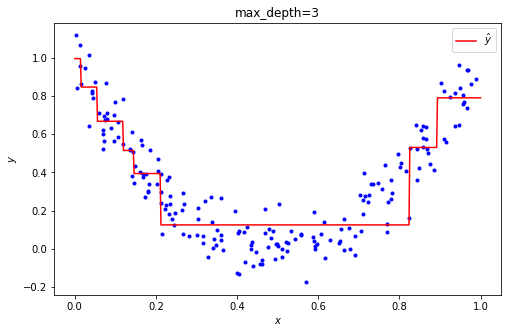

In [31]:
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X, y)

plot_regression_decision(tree_reg, X, y, title='max_depth=3')

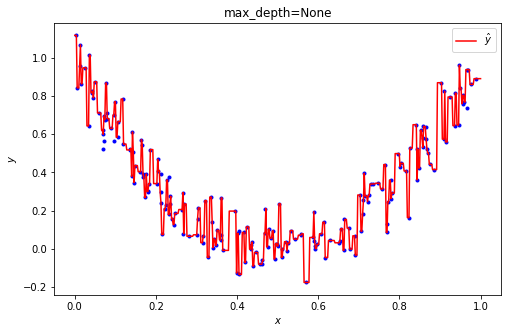

In [32]:
tree_reg = DecisionTreeRegressor().fit(X, y)

plot_regression_decision(tree_reg, X, y, title='max_depth=None')

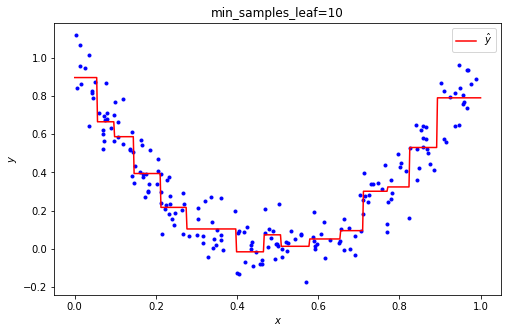

In [33]:
tree_reg = DecisionTreeRegressor(min_samples_leaf=10).fit(X, y)

plot_regression_decision(tree_reg, X, y, title='min_samples_leaf=10')

In [36]:
X = np.random.rand(m, 2) - .5
y = (X[:, 0] > 0).astype(float)

rot_45 = np.array([[1/np.sqrt(2), -1/np.sqrt(2)],
                   [1/np.sqrt(2), 1/np.sqrt(2)]])

In [37]:
X_rot45 = np.dot(X, rot_45)

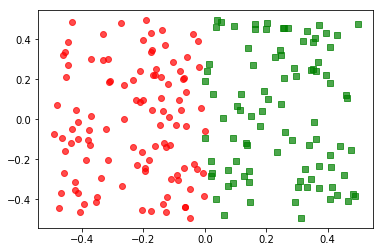

In [39]:
plt.plot(X[y==0, 0], X[y==0, 1], 'ro', alpha=.7, label='y=0')
plt.plot(X[y==1, 0], X[y==1, 1], 'gs', alpha=.7, label='y=1')

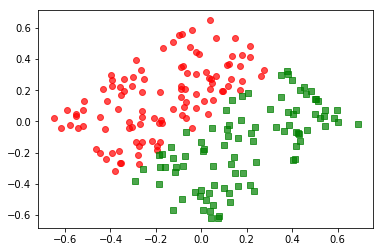

In [40]:
plt.plot(X_rot45[y==0, 0], X_rot45[y==0, 1], 'ro', alpha=.7, label='y=0')
plt.plot(X_rot45[y==1, 0], X_rot45[y==1, 1], 'gs', alpha=.7, label='y=1')

#### Exercises

In [126]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone

from scipy.stats import mode

#### ex.7

Text(0,0.5,'$x_2$')

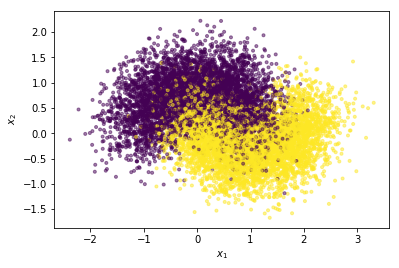

In [103]:
# generate moons dataset: n=1000, noise=0.4
X, y = datasets.make_moons(n_samples=10000, noise=0.4, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', alpha=.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [104]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 2), (8000,), (2000, 2), (2000,))

In [105]:
# default tree
tree_clf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(tree_clf, X_train, y_train, scoring='accuracy', cv=5)
scores.round(3)

array([0.785, 0.805, 0.813, 0.782, 0.813])

In [106]:
# baseline score: using default tree
np.mean(scores)

0.7995006394045466

In [107]:
# grid search: find best tree-model
params = {
    #'max_depth': [None] + list(range(1, 11)),
    'min_samples_split': np.arange(2, 20),
    'max_leaf_nodes': list(range(2, 100)),
}

tree_grid = RandomizedSearchCV(tree_clf, params, n_iter=200, verbose=2, 
                               random_state=42, scoring='accuracy', cv=5)

In [108]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] max_leaf_nodes=63, min_samples_split=11 .........................
[CV] .......... max_leaf_nodes=63, min_samples_split=11, total=   0.0s
[CV] max_leaf_nodes=63, min_samples_split=11 .........................
[CV] .......... max_leaf_nodes=63, min_samples_split=11, total=   0.0s
[CV] max_leaf_nodes=63, min_samples_split=11 .........................
[CV] .......... max_leaf_nodes=63, min_samples_split=11, total=   0.0s
[CV] max_leaf_nodes=63, min_samples_split=11 .........................
[CV] .......... max_leaf_nodes=63, min_samples_split=11, total=   0.0s
[CV] max_leaf_nodes=63, min_samples_split=11 .........................
[CV] .......... max_leaf_nodes=63, min_samples_split=11, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=16 .........................
[CV] .......... max_leaf_nodes=13, min_samples_split=16, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=16 .........................
[CV] ........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... max_leaf_nodes=13, min_samples_split=16, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=16 .........................
[CV] .......... max_leaf_nodes=13, min_samples_split=16, total=   0.0s
[CV] max_leaf_nodes=13, min_samples_split=16 .........................
[CV] .......... max_leaf_nodes=13, min_samples_split=16, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=17 .........................
[CV] .......... max_leaf_nodes=97, min_samples_split=17, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=17 .........................
[CV] .......... max_leaf_nodes=97, min_samples_split=17, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=17 .........................
[CV] .......... max_leaf_nodes=97, min_samples_split=17, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=17 .........................
[CV] .......... max_leaf_nodes=97, min_samples_split=17, total=   0.0s
[CV] max_leaf_nodes=97, min_samples_split=17 .........................
[CV] .

[CV] .......... max_leaf_nodes=72, min_samples_split=14, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=14 .........................
[CV] .......... max_leaf_nodes=72, min_samples_split=14, total=   0.0s
[CV] max_leaf_nodes=72, min_samples_split=14 .........................
[CV] .......... max_leaf_nodes=72, min_samples_split=14, total=   0.0s
[CV] max_leaf_nodes=15, min_samples_split=7 ..........................
[CV] ........... max_leaf_nodes=15, min_samples_split=7, total=   0.0s
[CV] max_leaf_nodes=15, min_samples_split=7 ..........................
[CV] ........... max_leaf_nodes=15, min_samples_split=7, total=   0.0s
[CV] max_leaf_nodes=15, min_samples_split=7 ..........................
[CV] ........... max_leaf_nodes=15, min_samples_split=7, total=   0.0s
[CV] max_leaf_nodes=15, min_samples_split=7 ..........................
[CV] ........... max_leaf_nodes=15, min_samples_split=7, total=   0.0s
[CV] max_leaf_nodes=15, min_samples_split=7 ..........................
[CV] .

[CV] max_leaf_nodes=21, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=21, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=21, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=21, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=21, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=21, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=21, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=21, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=21, min_samples_split=4 ..........................
[CV] ........... max_leaf_nodes=21, min_samples_split=4, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=9 ..........................
[CV] ........... max_leaf_nodes=89, min_samples_split=9, total=   0.0s
[CV] max_leaf_nodes=89, min_samples_split=9 ..........................
[CV] ........... max_leaf_nodes=89, min_samples_split=9, total=   0.0s
[CV] m

[CV] max_leaf_nodes=25, min_samples_split=17 .........................
[CV] .......... max_leaf_nodes=25, min_samples_split=17, total=   0.0s
[CV] max_leaf_nodes=25, min_samples_split=17 .........................
[CV] .......... max_leaf_nodes=25, min_samples_split=17, total=   0.0s
[CV] max_leaf_nodes=25, min_samples_split=17 .........................
[CV] .......... max_leaf_nodes=25, min_samples_split=17, total=   0.0s
[CV] max_leaf_nodes=25, min_samples_split=17 .........................
[CV] .......... max_leaf_nodes=25, min_samples_split=17, total=   0.0s
[CV] max_leaf_nodes=25, min_samples_split=17 .........................
[CV] .......... max_leaf_nodes=25, min_samples_split=17, total=   0.0s
[CV] max_leaf_nodes=66, min_samples_split=10 .........................
[CV] .......... max_leaf_nodes=66, min_samples_split=10, total=   0.0s
[CV] max_leaf_nodes=66, min_samples_split=10 .........................
[CV] .......... max_leaf_nodes=66, min_samples_split=10, total=   0.0s
[CV] m

[CV] .......... max_leaf_nodes=78, min_samples_split=15, total=   0.0s
[CV] max_leaf_nodes=78, min_samples_split=15 .........................
[CV] .......... max_leaf_nodes=78, min_samples_split=15, total=   0.0s
[CV] max_leaf_nodes=27, min_samples_split=16 .........................
[CV] .......... max_leaf_nodes=27, min_samples_split=16, total=   0.0s
[CV] max_leaf_nodes=27, min_samples_split=16 .........................
[CV] .......... max_leaf_nodes=27, min_samples_split=16, total=   0.0s
[CV] max_leaf_nodes=27, min_samples_split=16 .........................
[CV] .......... max_leaf_nodes=27, min_samples_split=16, total=   0.0s
[CV] max_leaf_nodes=27, min_samples_split=16 .........................
[CV] .......... max_leaf_nodes=27, min_samples_split=16, total=   0.0s
[CV] max_leaf_nodes=27, min_samples_split=16 .........................
[CV] .......... max_leaf_nodes=27, min_samples_split=16, total=   0.0s
[CV] max_leaf_nodes=38, min_samples_split=14 .........................
[CV] .

[CV] .......... max_leaf_nodes=52, min_samples_split=19, total=   0.0s
[CV] max_leaf_nodes=52, min_samples_split=19 .........................
[CV] .......... max_leaf_nodes=52, min_samples_split=19, total=   0.0s
[CV] max_leaf_nodes=52, min_samples_split=19 .........................
[CV] .......... max_leaf_nodes=52, min_samples_split=19, total=   0.0s
[CV] max_leaf_nodes=34, min_samples_split=17 .........................
[CV] .......... max_leaf_nodes=34, min_samples_split=17, total=   0.0s
[CV] max_leaf_nodes=34, min_samples_split=17 .........................
[CV] .......... max_leaf_nodes=34, min_samples_split=17, total=   0.0s
[CV] max_leaf_nodes=34, min_samples_split=17 .........................
[CV] .......... max_leaf_nodes=34, min_samples_split=17, total=   0.0s
[CV] max_leaf_nodes=34, min_samples_split=17 .........................
[CV] .......... max_leaf_nodes=34, min_samples_split=17, total=   0.0s
[CV] max_leaf_nodes=34, min_samples_split=17 .........................
[CV] .

[CV] .......... max_leaf_nodes=75, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=75, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=75, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=75, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=75, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=8, min_samples_split=5 ...........................
[CV] ............ max_leaf_nodes=8, min_samples_split=5, total=   0.0s
[CV] max_leaf_nodes=8, min_samples_split=5 ...........................
[CV] ............ max_leaf_nodes=8, min_samples_split=5, total=   0.0s
[CV] max_leaf_nodes=8, min_samples_split=5 ...........................
[CV] ............ max_leaf_nodes=8, min_samples_split=5, total=   0.0s
[CV] max_leaf_nodes=8, min_samples_split=5 ...........................
[CV] ............ max_leaf_nodes=8, min_samples_split=5, total=   0.0s
[CV] max_leaf_nodes=8, min_samples_split=5 ...........................
[CV] .

[CV] ........... max_leaf_nodes=77, min_samples_split=8, total=   0.0s
[CV] max_leaf_nodes=77, min_samples_split=8 ..........................
[CV] ........... max_leaf_nodes=77, min_samples_split=8, total=   0.0s
[CV] max_leaf_nodes=77, min_samples_split=8 ..........................
[CV] ........... max_leaf_nodes=77, min_samples_split=8, total=   0.0s
[CV] max_leaf_nodes=77, min_samples_split=8 ..........................
[CV] ........... max_leaf_nodes=77, min_samples_split=8, total=   0.0s
[CV] max_leaf_nodes=77, min_samples_split=8 ..........................
[CV] ........... max_leaf_nodes=77, min_samples_split=8, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=19 .........................
[CV] .......... max_leaf_nodes=48, min_samples_split=19, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=19 .........................
[CV] .......... max_leaf_nodes=48, min_samples_split=19, total=   0.0s
[CV] max_leaf_nodes=48, min_samples_split=19 .........................
[CV] .

[CV] ........... max_leaf_nodes=26, min_samples_split=9, total=   0.0s
[CV] max_leaf_nodes=26, min_samples_split=9 ..........................
[CV] ........... max_leaf_nodes=26, min_samples_split=9, total=   0.0s
[CV] max_leaf_nodes=26, min_samples_split=9 ..........................
[CV] ........... max_leaf_nodes=26, min_samples_split=9, total=   0.0s
[CV] max_leaf_nodes=20, min_samples_split=9 ..........................
[CV] ........... max_leaf_nodes=20, min_samples_split=9, total=   0.0s
[CV] max_leaf_nodes=20, min_samples_split=9 ..........................
[CV] ........... max_leaf_nodes=20, min_samples_split=9, total=   0.0s
[CV] max_leaf_nodes=20, min_samples_split=9 ..........................
[CV] ........... max_leaf_nodes=20, min_samples_split=9, total=   0.0s
[CV] max_leaf_nodes=20, min_samples_split=9 ..........................
[CV] ........... max_leaf_nodes=20, min_samples_split=9, total=   0.0s
[CV] max_leaf_nodes=20, min_samples_split=9 ..........................
[CV] .

[CV] .......... max_leaf_nodes=36, min_samples_split=10, total=   0.0s
[CV] max_leaf_nodes=36, min_samples_split=10 .........................
[CV] .......... max_leaf_nodes=36, min_samples_split=10, total=   0.0s
[CV] max_leaf_nodes=36, min_samples_split=10 .........................
[CV] .......... max_leaf_nodes=36, min_samples_split=10, total=   0.0s
[CV] max_leaf_nodes=36, min_samples_split=10 .........................
[CV] .......... max_leaf_nodes=36, min_samples_split=10, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=10 .........................
[CV] .......... max_leaf_nodes=31, min_samples_split=10, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=10 .........................
[CV] .......... max_leaf_nodes=31, min_samples_split=10, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=10 .........................
[CV] .......... max_leaf_nodes=31, min_samples_split=10, total=   0.0s
[CV] max_leaf_nodes=31, min_samples_split=10 .........................
[CV] .

[CV] .......... max_leaf_nodes=79, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=79, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=79, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=79, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=79, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=79, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=79, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=79, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=79, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=13 .........................
[CV] .......... max_leaf_nodes=22, min_samples_split=13, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=13 .........................
[CV] .......... max_leaf_nodes=22, min_samples_split=13, total=   0.0s
[CV] max_leaf_nodes=22, min_samples_split=13 .........................
[CV] .

[CV] ........... max_leaf_nodes=98, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=98, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=98, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=98, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=98, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=98, min_samples_split=3 ..........................
[CV] ........... max_leaf_nodes=98, min_samples_split=3, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=23, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=23, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=23, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=23, min_samples_split=18 .........................
[CV] .

[CV] ........... max_leaf_nodes=25, min_samples_split=8, total=   0.0s
[CV] max_leaf_nodes=25, min_samples_split=8 ..........................
[CV] ........... max_leaf_nodes=25, min_samples_split=8, total=   0.0s
[CV] max_leaf_nodes=25, min_samples_split=8 ..........................
[CV] ........... max_leaf_nodes=25, min_samples_split=8, total=   0.0s
[CV] max_leaf_nodes=25, min_samples_split=8 ..........................
[CV] ........... max_leaf_nodes=25, min_samples_split=8, total=   0.0s
[CV] max_leaf_nodes=59, min_samples_split=10 .........................
[CV] .......... max_leaf_nodes=59, min_samples_split=10, total=   0.0s
[CV] max_leaf_nodes=59, min_samples_split=10 .........................
[CV] .......... max_leaf_nodes=59, min_samples_split=10, total=   0.0s
[CV] max_leaf_nodes=59, min_samples_split=10 .........................
[CV] .......... max_leaf_nodes=59, min_samples_split=10, total=   0.0s
[CV] max_leaf_nodes=59, min_samples_split=10 .........................
[CV] .

[CV] ........... max_leaf_nodes=38, min_samples_split=8, total=   0.0s
[CV] max_leaf_nodes=38, min_samples_split=8 ..........................
[CV] ........... max_leaf_nodes=38, min_samples_split=8, total=   0.0s
[CV] max_leaf_nodes=38, min_samples_split=8 ..........................
[CV] ........... max_leaf_nodes=38, min_samples_split=8, total=   0.0s
[CV] max_leaf_nodes=3, min_samples_split=14 ..........................
[CV] ........... max_leaf_nodes=3, min_samples_split=14, total=   0.0s
[CV] max_leaf_nodes=3, min_samples_split=14 ..........................
[CV] ........... max_leaf_nodes=3, min_samples_split=14, total=   0.0s
[CV] max_leaf_nodes=3, min_samples_split=14 ..........................
[CV] ........... max_leaf_nodes=3, min_samples_split=14, total=   0.0s
[CV] max_leaf_nodes=3, min_samples_split=14 ..........................
[CV] ........... max_leaf_nodes=3, min_samples_split=14, total=   0.0s
[CV] max_leaf_nodes=3, min_samples_split=14 ..........................
[CV] .

[CV] max_leaf_nodes=91, min_samples_split=12 .........................
[CV] .......... max_leaf_nodes=91, min_samples_split=12, total=   0.0s
[CV] max_leaf_nodes=91, min_samples_split=12 .........................
[CV] .......... max_leaf_nodes=91, min_samples_split=12, total=   0.0s
[CV] max_leaf_nodes=91, min_samples_split=12 .........................
[CV] .......... max_leaf_nodes=91, min_samples_split=12, total=   0.0s
[CV] max_leaf_nodes=91, min_samples_split=12 .........................
[CV] .......... max_leaf_nodes=91, min_samples_split=12, total=   0.0s
[CV] max_leaf_nodes=94, min_samples_split=19 .........................
[CV] .......... max_leaf_nodes=94, min_samples_split=19, total=   0.0s
[CV] max_leaf_nodes=94, min_samples_split=19 .........................
[CV] .......... max_leaf_nodes=94, min_samples_split=19, total=   0.0s
[CV] max_leaf_nodes=94, min_samples_split=19 .........................
[CV] .......... max_leaf_nodes=94, min_samples_split=19, total=   0.0s
[CV] m

[CV] .......... max_leaf_nodes=85, min_samples_split=19, total=   0.0s
[CV] max_leaf_nodes=85, min_samples_split=19 .........................
[CV] .......... max_leaf_nodes=85, min_samples_split=19, total=   0.0s
[CV] max_leaf_nodes=85, min_samples_split=19 .........................
[CV] .......... max_leaf_nodes=85, min_samples_split=19, total=   0.0s
[CV] max_leaf_nodes=85, min_samples_split=19 .........................
[CV] .......... max_leaf_nodes=85, min_samples_split=19, total=   0.0s
[CV] max_leaf_nodes=85, min_samples_split=19 .........................
[CV] .......... max_leaf_nodes=85, min_samples_split=19, total=   0.0s
[CV] max_leaf_nodes=95, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=95, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=95, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=95, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=95, min_samples_split=18 .........................
[CV] .

[CV] max_leaf_nodes=12, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=12, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=12, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=12, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=12, min_samples_split=18 .........................
[CV] .......... max_leaf_nodes=12, min_samples_split=18, total=   0.0s
[CV] max_leaf_nodes=67, min_samples_split=9 ..........................
[CV] ........... max_leaf_nodes=67, min_samples_split=9, total=   0.0s
[CV] max_leaf_nodes=67, min_samples_split=9 ..........................
[CV] ........... max_leaf_nodes=67, min_samples_split=9, total=   0.0s
[CV] max_leaf_nodes=67, min_samples_split=9 ..........................
[CV] ........... max_leaf_nodes=67, min_samples_split=9, total=   0.0s
[CV] max_leaf_nodes=67, min_samples_split=9 ..........................
[CV] ........... max_leaf_nodes=67, min_samples_split=9, total=   0.0s
[CV] m

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   25.2s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          fit_params=None, iid=True, n_iter=200, n_jobs=1,
          param_distributions={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, ...ples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='a

In [109]:
tree_grid.best_estimator_, tree_grid.best_score_

(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=23,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=6,
             min_weight_fraction_leaf=0.0, presort=False, random_state=42,
             splitter='best'), 0.85925)

In [110]:
# test accuracy: best tree model
accuracy_score(y_test, tree_grid.best_estimator_.predict(X_test))

0.8735

#### ex.8

In [114]:
predicts_1000trees = np.zeros(shape=(len(X_test), 1000), dtype=np.int8)

In [120]:
for i,(_, ts_idx) in enumerate(ShuffleSplit(n_splits=1000, test_size=100, random_state=42).split(X_train, y_train)):
    small_tree = clone(tree_grid.best_estimator_)
    small_tree.fit(X_train[ts_idx], y_train[ts_idx])
    y_pred = small_tree.predict(X_test)
    predicts_1000trees[:, i] = y_pred

In [123]:
accuracy_by_models = (y_test[:, None] == predicts_1000trees).mean(axis=0)

In [125]:
# average preformance for each model
accuracy_by_models.mean()

0.8027255

In [129]:
# select most frequent prediction from all trees for each test sample
pred_mode, pred_count = mode(predicts_1000trees, axis=1)

In [132]:
# accuracy: voting result
accuracy_score(y_test, pred_mode.ravel())

0.874